In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
import itertools
import os
import math
from collections import defaultdict

In [ ]:
# change path
facebook_edges_filepath = "../data/Facebook-Ego/686.edges"
twitter_edges_filepath = "../data/Twitter-Ego/1435461.edges"

In [4]:
# Load the /.edges files
# Facebook is an undirected network
graphFacebook = nx.read_edgelist(facebook_edges_filepath, create_using=nx.Graph())

# Twitter is a directed network
graphTwitter = nx.read_edgelist(twitter_edges_filepath, create_using=nx.DiGraph())

In [5]:
# Basic attributes check
print("Number of nodes={}, edges={} in facebook graph.".format(graphFacebook.number_of_nodes(), graphFacebook.number_of_edges()))
print("Number of nodes={}, edges={} in Twitter graph.".format(graphTwitter.number_of_nodes(), graphTwitter.number_of_edges()))

Number of nodes=168, edges=1656 in facebook graph.
Number of nodes=129, edges=8037 in Twitter graph.


### I will choose one of the datasets, calculate the betweenness closeness and PageRank on all of the nodes then compare the results. What cause the difference between the results?

In [6]:
# Function to plot tables
def plot_table(data, columns, target, id, widths):
    plt.rcdefaults()
    #plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    
    ax.set_axis_off()
    ax.table(
        cellText=data,
        colLabels=columns,
        cellLoc='center',
        loc='upper center',
        colWidths=widths,
        colColours=['gray', 'gray']
    )
    ax.set_title('Table showing {} of all Nodes in {}'.format(target, id), fontweight='bold')
    plt.savefig(target + '_' + id + '.png',
                transparent=False,
                bbox_inches='tight')
    plt.show()

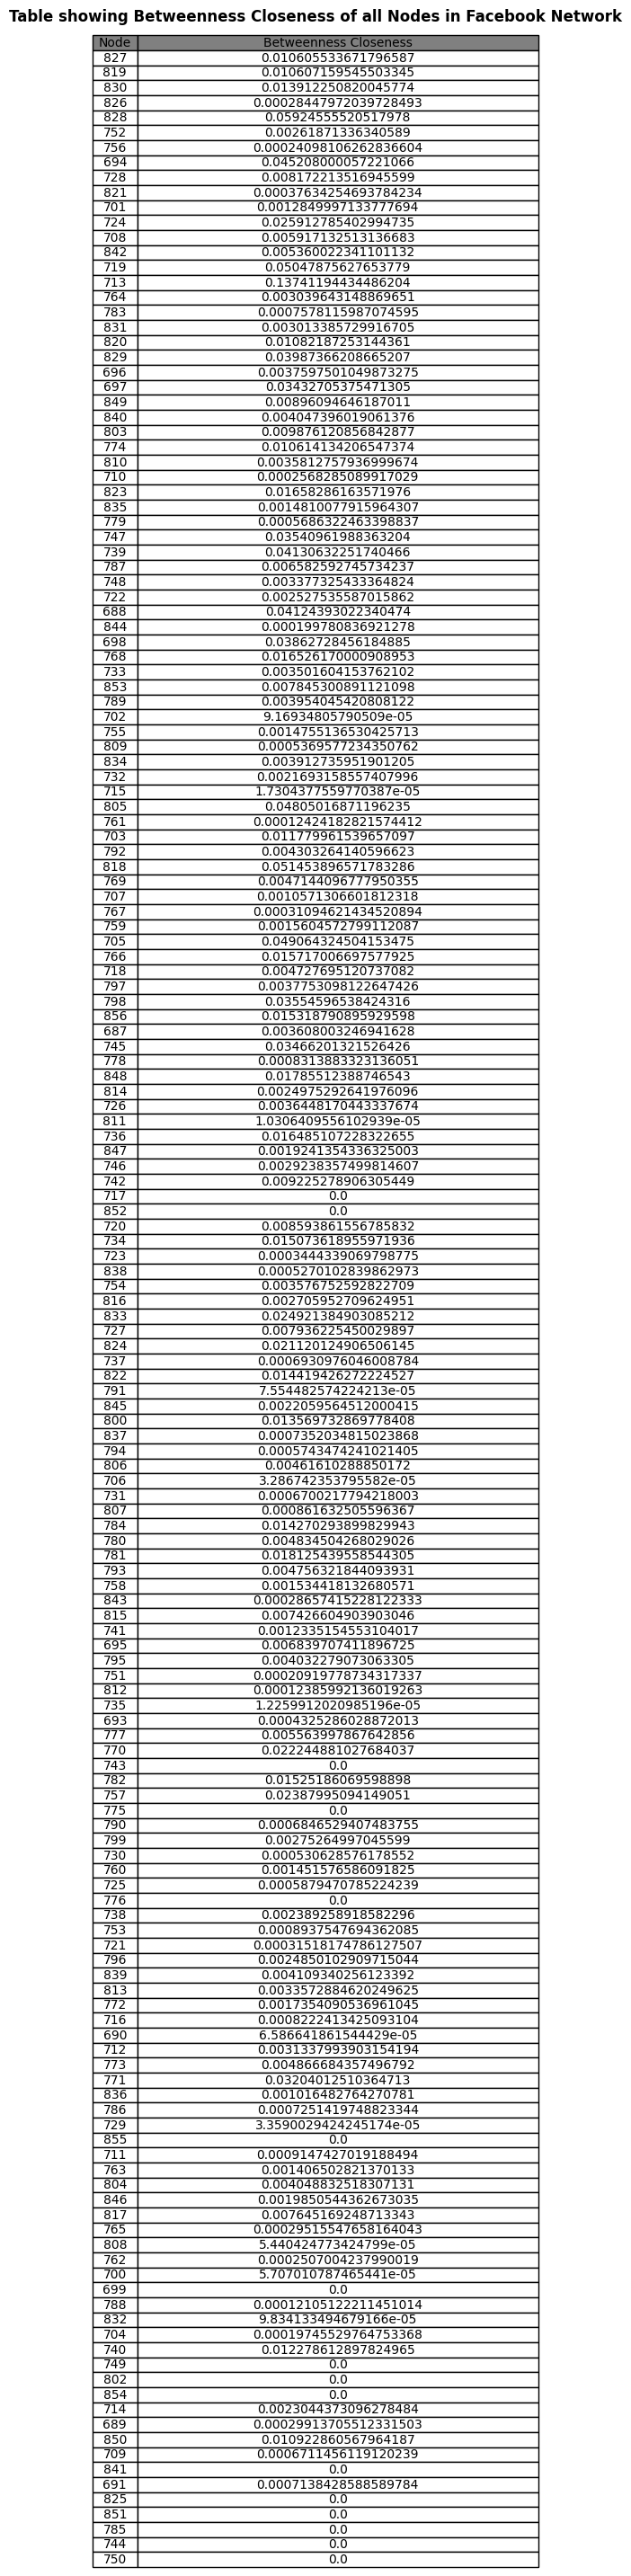

In [7]:
# Making use of the Facebook-Ego dataset

# Betweenness Closeness (Not Nornamlized) of all Nodes
Betweenness_Closeness_Facebook = nx.betweenness_centrality(G=graphFacebook)

# Get 2D list of each Node and the betweenness closeness to be used to plot a table
dataBC = [[key, str(value)] for key, value in Betweenness_Closeness_Facebook.items()]
columnsBC = ['Node', 'Betweenness Closeness']
widths=[0.1,0.9]


# Plot table
plot_table(data=dataBC,
           columns=columnsBC,
           target='Betweenness Closeness',
           id='Facebook Network',
           widths=widths)

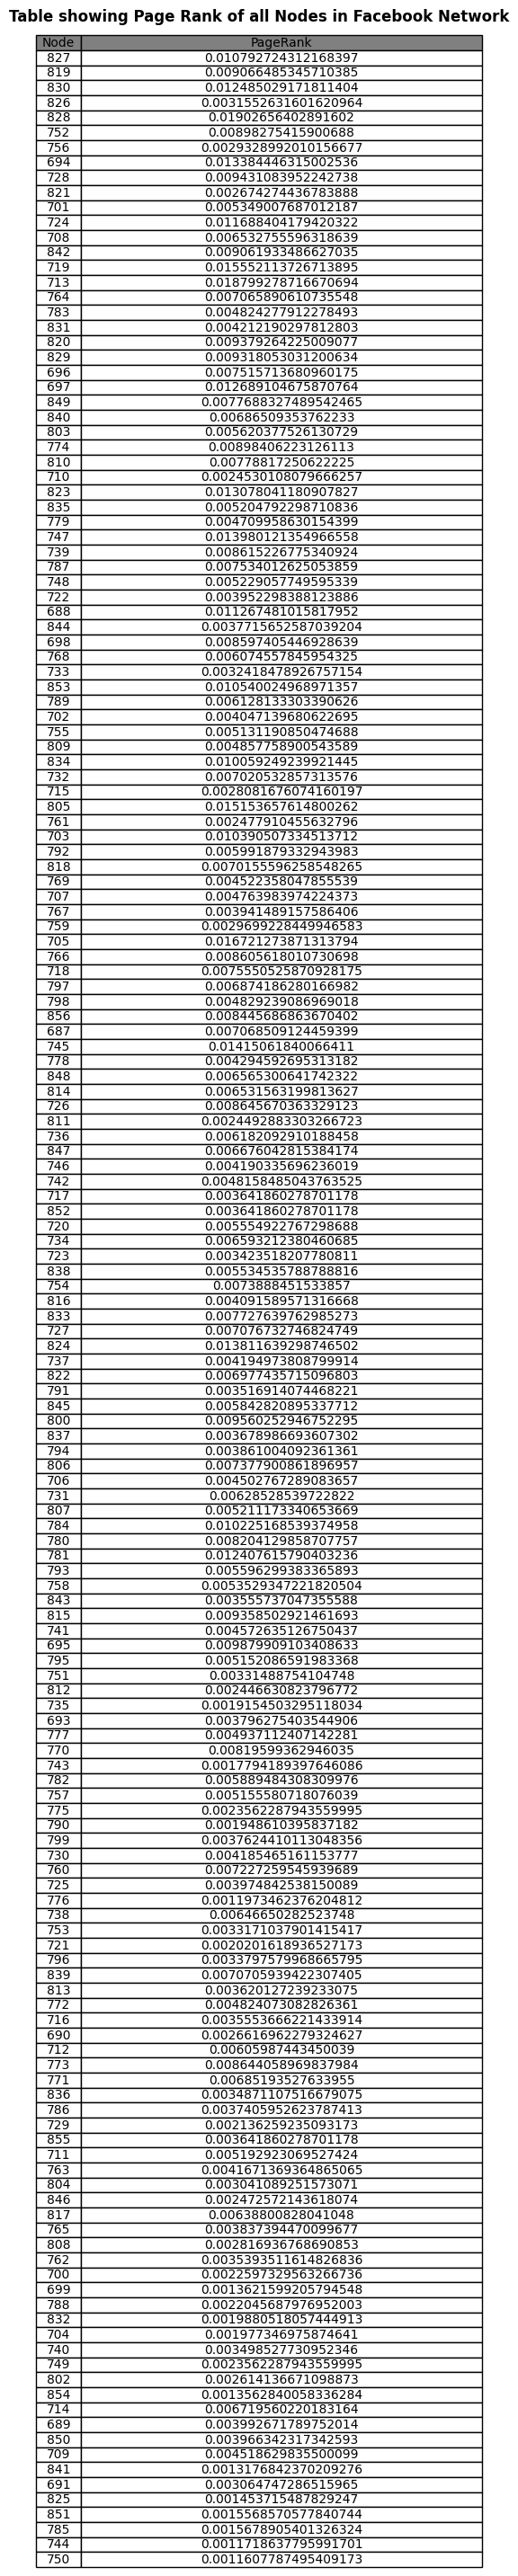

In [8]:
# Making use of the Facebook-Ego dataset

# PageRank of all Nodes
pageRankFb = nx.pagerank(graphFacebook)

# Get 2D list of each Node and the betweenness closeness to be used to plot a table
dataPR = [[key, str(value)] for key, value in pageRankFb.items()]
columnsPR = ['Node', 'PageRank']
widths=[0.1,0.9]


# Plot table
plot_table(data=dataPR,
           columns=columnsPR,
           target='Page Rank',
           id='Facebook Network',
           widths=widths)

### I will compare the results above and suggest what causes the difference between the results?

In [ ]:
# Comparing the results --> I will subtract the value of PageRank from Betweenness closeness,
# i.e. Betweenness closeness - PageRank
diff_BC_PR = [[key, value - pageRankFb[key]] for key, value in Betweenness_Closeness_Facebook.items()]

# Uncomment the code line 6 to see the result if interested
#diff_BC_PR

The result of the pagerank are in most cases higher than the betweeness closeness for each node.
This difference in the results can be attributed to these factors;
- While Betweenness closeness algorithm tries to detect that amount of influence a node has over the free movement of information in the network, PageRank algorithm on the other hand is trying to calculate the directional influence of each node (if a node is connected to a high scoring node, this contributes to it potential score.)
- Another factor is that betweeness closeness algorithm can be used on undirected graphs since it is not calculating directional influence, PageRank on the other hand has to consider an undirected graph as directed graph. This leads to different values.

### Plot the largest strong connected component in the Twitter-Ego dataset

In [9]:
# To plot a graph structure

def plot_graph_structure(G, id):
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("{} graph structure".format(id), 
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')
    nx.draw_networkx(G, node_size=10, with_labels=False, arrowstyle='-', arrowsize=1, node_color='black', edge_color='lightgray')
    fig.tight_layout()
    plt.savefig("{} Graph Structure.png".format(id), transparent=False)
    return

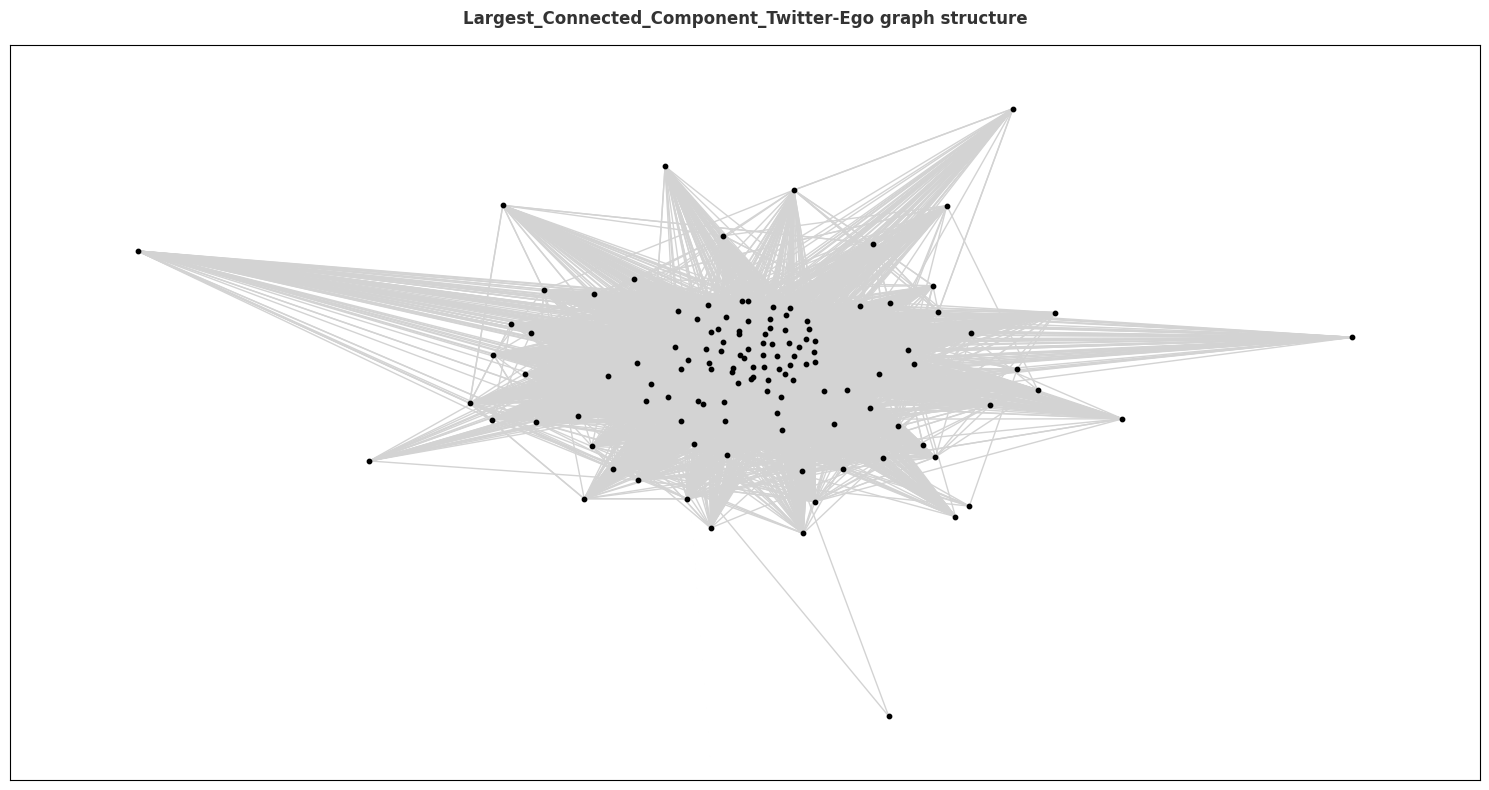

In [10]:
# For Twitther the directed graph, we first find the largest connected component
largest_cc_twitter = max(nx.strongly_connected_components(graphTwitter), key=len)

# Extract the subgraph of the largest connected component
induced_subgraph = graphTwitter.subgraph(largest_cc_twitter).copy()

# Plot the largest connected component
plot_graph_structure(induced_subgraph, 'Largest_Connected_Component_Twitter-Ego')

### I will choose the results of one of the two algorithms mentioned in the first task and choose the node with the highest value and the node with lowest value. I will plot the distributions of Jaccard similarity, cosine similarity and normalized Euclidean distance between either of the two nodes and the rest of the nodes in the graph

In [11]:
# I will use the result from the betweeness closeness algorithm

# Find nodes with highest and lowest values
print("Using the result from the BETWEENNESS CLOSENESS algorithm in Question A \n")

max_BC = max(zip(Betweenness_Closeness_Facebook.values(), Betweenness_Closeness_Facebook.keys()))
min_BC = min(zip(Betweenness_Closeness_Facebook.values(), Betweenness_Closeness_Facebook.keys()))

print("Maximum betweenness closeness value and node are: {}".format(max_BC))
print("Minimum betweenness closeness value and node are: {}".format(min_BC))

Using the result from the BETWEENNESS CLOSENESS algorithm in Question A 

Maximum betweenness closeness value and node are: (0.13741194434486204, '713')
Minimum betweenness closeness value and node are: (0.0, '699')


In [12]:
def plot_distribution(values, id, col):
    """_summary_
    Returns plot of degree distribution and saves the plot to the system
    """
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.hist(values, color=col, bins=10)
    
    # Beautify the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_color('#DDDDDD')
    ax.spines['bottom'].set_linewidth(2.5)

    # Remove axis ticks.
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
    
    ax.set_ylabel("Count", labelpad=15, color='#333333')
    ax.set_xlabel(id, labelpad=15, color='#333333')
    ax.set_title("Distribution of {}".format(id), pad=15, color='#333333',
             weight='bold')
    ax.margins(0)
    
    fig.tight_layout()
    #plt.savefig('{}_Distribution.png'.format(id), transparent=False)
    return

In [13]:
# Node with the highest betweenness closeness
node_i_max = max_BC[1]
# Node with the lowest betweenness closeness
node_i_min = min_BC[1]

# Combination of the above nodes with the rest of the nodes in the Facebook Network
node_pairs_max = [(node_i_max, j) for j in list(graphFacebook.nodes) if node_i_max != j]
node_pairs_min = [(node_i_min, j) for j in list(graphFacebook.nodes) if node_i_min != j]

### Jaccard coefficient

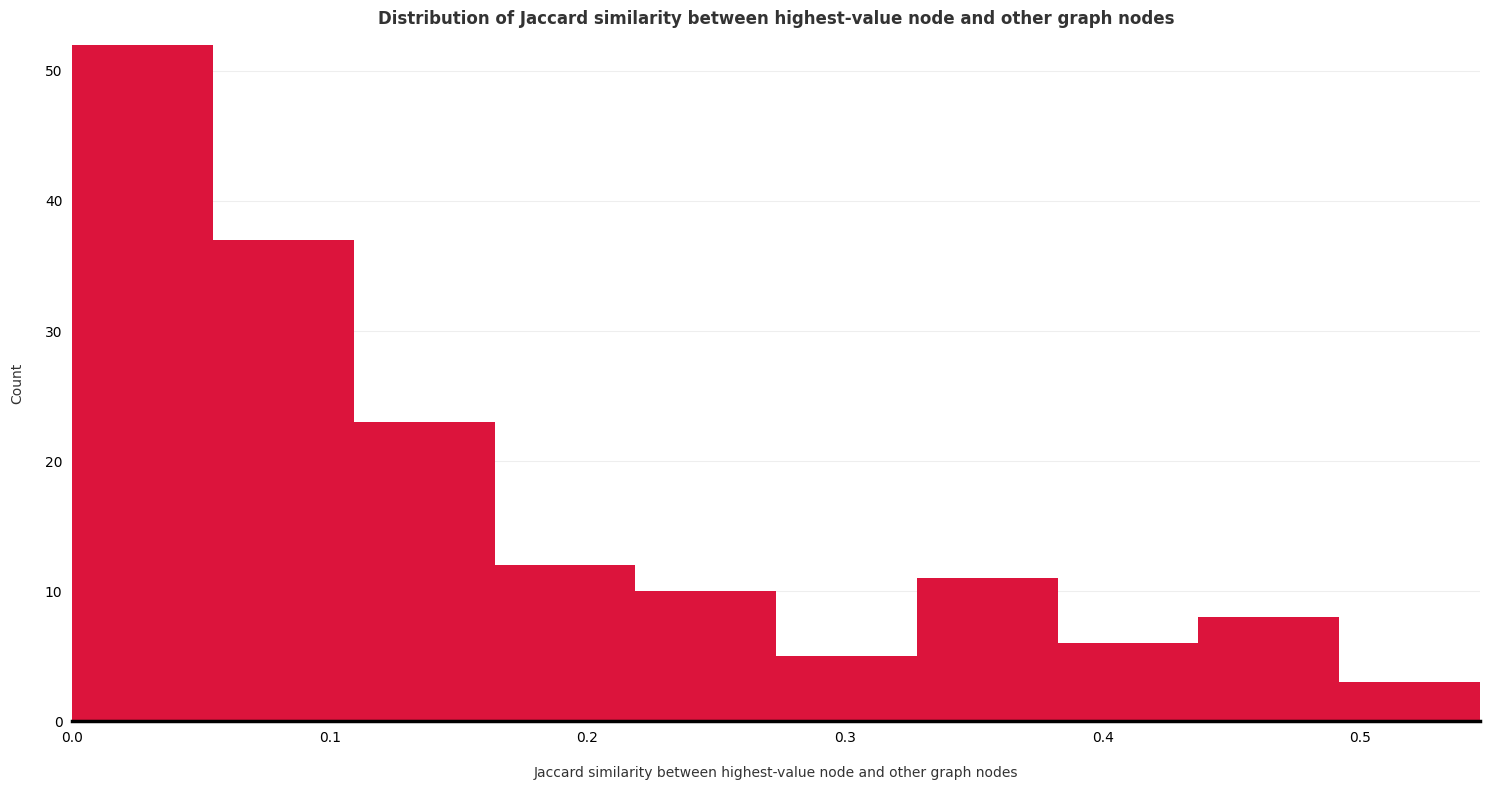

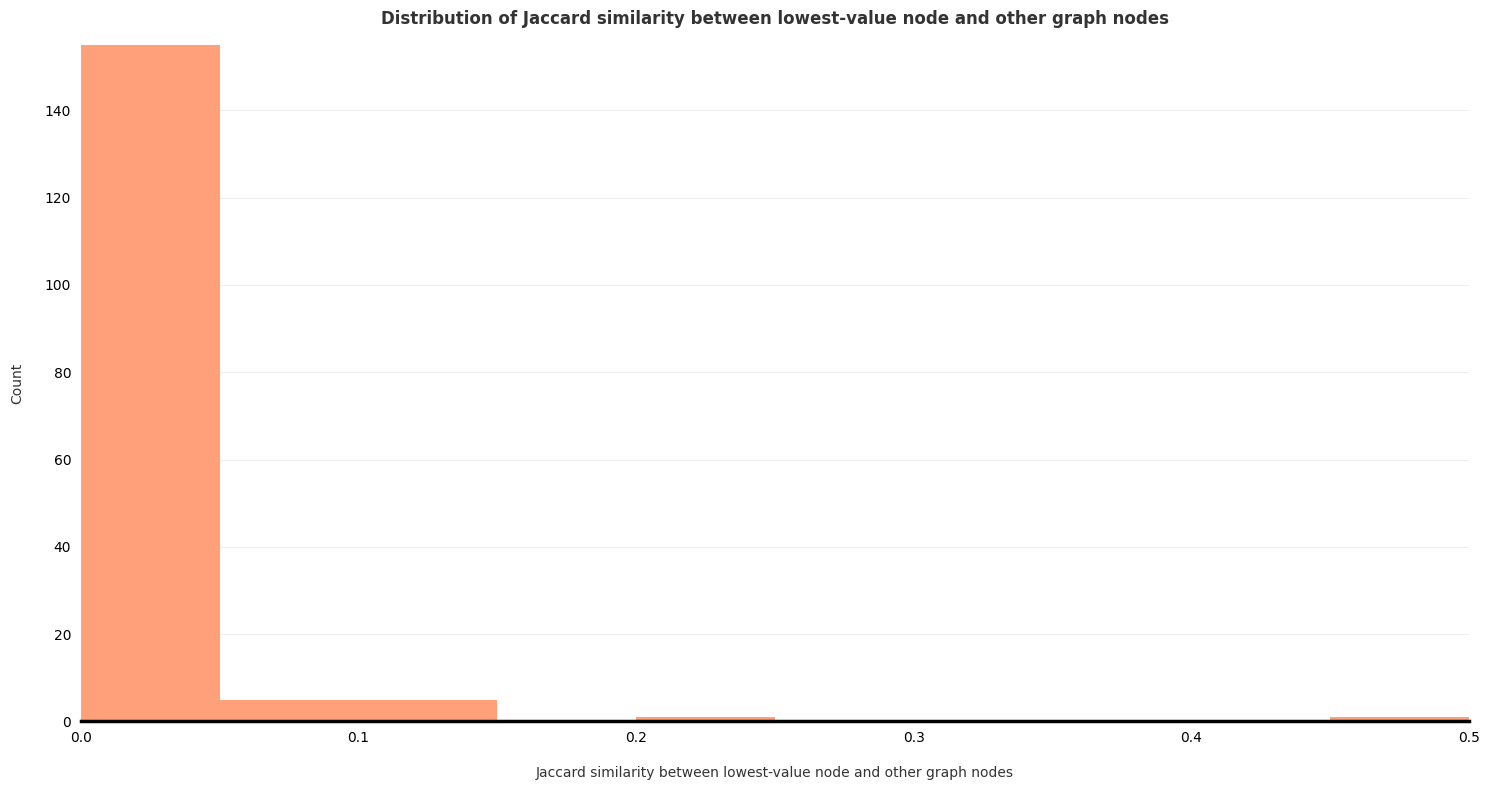

In [14]:
# nx.jaccard_coefficient returns an iterator of 3-tuples in the form (u, v, p) 
# where (u, v) is a pair of nodes and p is their Jaccard coefficient.
jaccard_sim_max = nx.jaccard_coefficient(graphFacebook, node_pairs_max)
jaccard_sim_min = nx.jaccard_coefficient(graphFacebook, node_pairs_min)

# Plot distribution of Jaccard similarity
plot_distribution([p for _,_,p in jaccard_sim_max]
                  , 'Jaccard similarity between highest-value node and other graph nodes'
                  , 'crimson')
plot_distribution([p for _,_,p in jaccard_sim_min]
                  , 'Jaccard similarity between lowest-value node and other graph nodes'
                  , 'lightsalmon')

### Cosine similarity

In [15]:
# Cosine similarity
def cosine_similarity(node_pairs):
    """
    Refering to the lecture notes,
    I use the formula s(i,j) = |Ni n Nj| / sqrt(|Ni||Nj|)
    where Ni refers to the Neighbors of node i
    Args:
        node_pairs (_type_): Combination of the node with the maximum betweenness closeness with the rest 
        of the nodes in the Facebook Network
    Returns: an iterator of 3-tuples in the form (i, j, c) 
            where (i, j) is a pair of nodes and c is their cosine similarity.
    """
    for node_i, node_j in node_pairs:
        # Number of common neighbors
        number_common_neighbors = len(list(nx.common_neighbors(graphFacebook, node_i, node_j)))
        
        # Number of neighbors of node i
        number_neighbors_i = len(list(graphFacebook.neighbors(node_i)))
        
        # Number of neighbors of node j
        number_neighbors_j = len(list(graphFacebook.neighbors(node_j)))
        
        # Geometric mean
        geometric_mean = math.sqrt(number_neighbors_i*number_neighbors_j)
        
        #cosine similarity
        cos_sim = number_common_neighbors/geometric_mean
        
        yield node_i, node_j, cos_sim

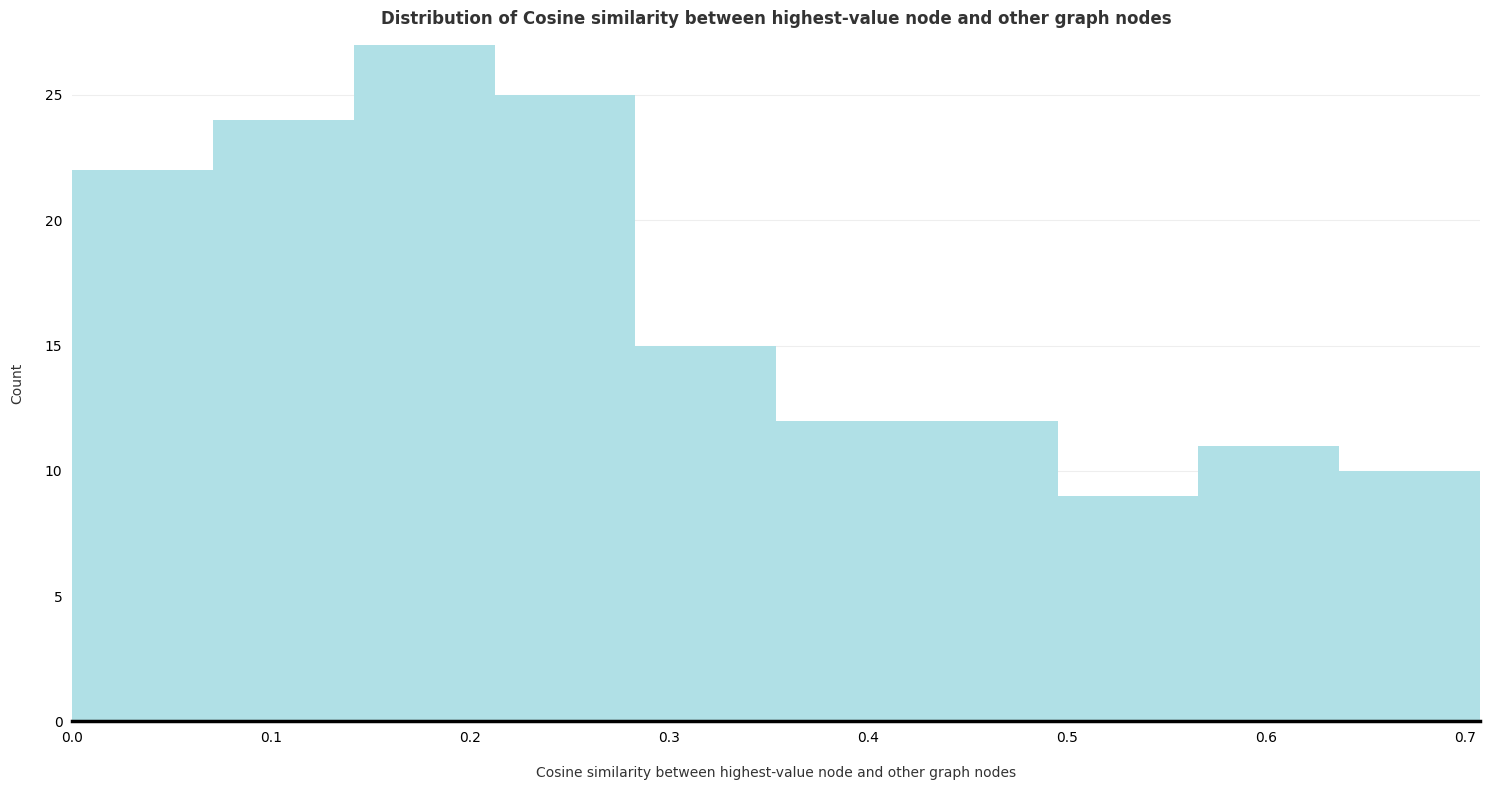

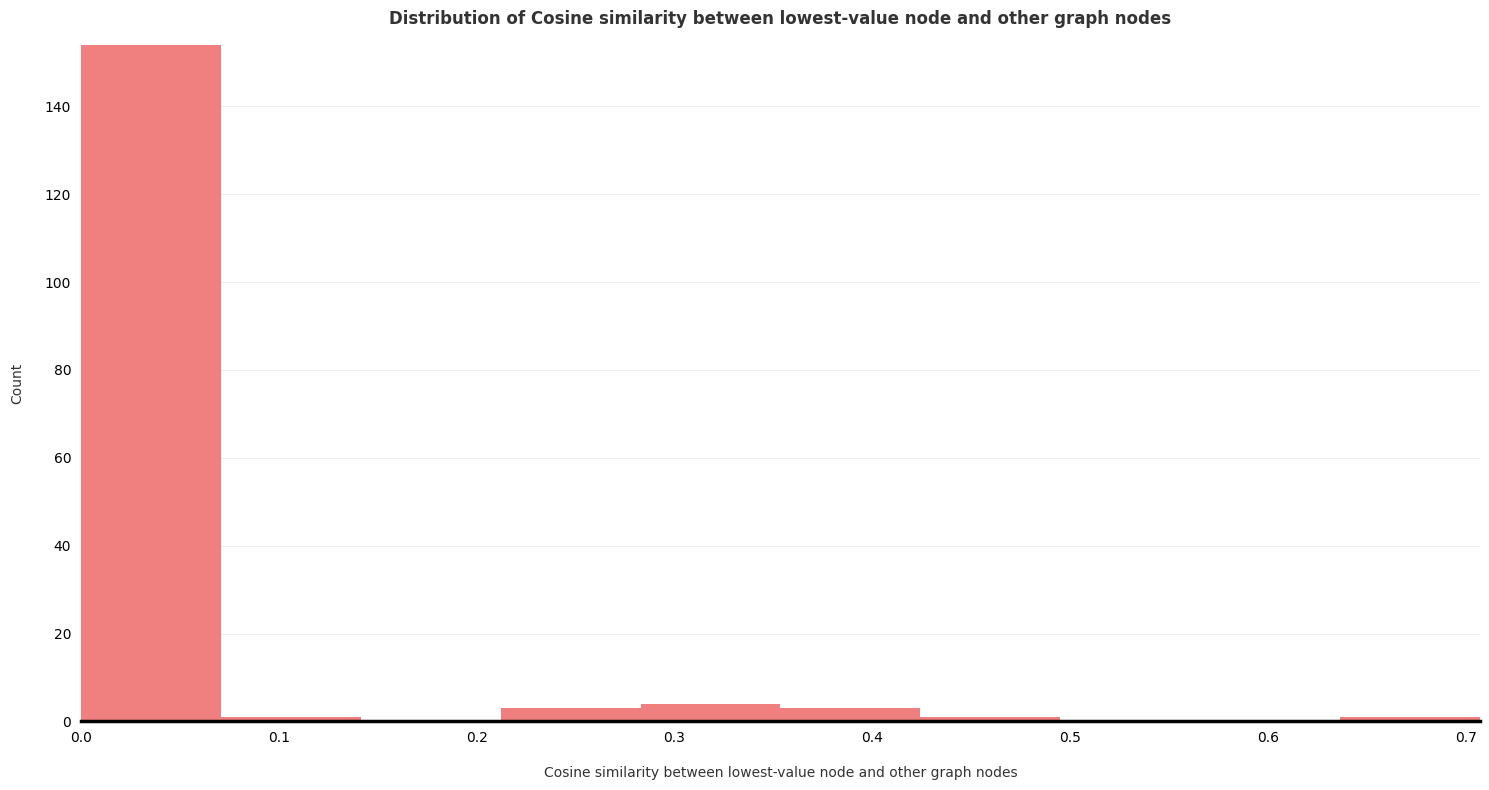

In [16]:
# Calculate cosine similarity
cosine_sim_max = cosine_similarity(node_pairs=node_pairs_max)
cosine_sim_min = cosine_similarity(node_pairs=node_pairs_min)

# Plot distribution of cosine similarity
plot_distribution([c for _,_,c in cosine_sim_max]
                  , 'Cosine similarity between highest-value node and other graph nodes'
                  , 'powderblue')
plot_distribution([c for _,_,c in cosine_sim_min]
                  , 'Cosine similarity between lowest-value node and other graph nodes'
                  , 'lightcoral')

### Euclidean distance

In [17]:
def euclidean_distance(node_pairs):
    """
    I use the formula d(i,j) = 1 - 2(|Ni n Nj| / |Ni| + |Nj|)
    where Ni refers to the Neighbors of node i
    Args:
        node_pairs (_type_): Combination of the node with the maximum betweenness closeness with the rest 
        of the nodes in the Facebook Network
    Returns: an iterator of 3-tuples in the form (i, j, d) 
            where (i, j) is a pair of nodes and d is the euclidean distance.
    """
    for node_i, node_j in node_pairs:
        # Number of common neighbors
        number_common_neighbors = len(list(nx.common_neighbors(graphFacebook, node_i, node_j)))
        
        # Number of neighbors of node i
        number_neighbors_i = len(list(graphFacebook.neighbors(node_i)))
        
        # Number of neighbors of node j
        number_neighbors_j = len(list(graphFacebook.neighbors(node_j)))
        
        # Geometric mean
        sum_neighbors_ij = number_neighbors_i + number_neighbors_j
        
        #cosine similarity
        eucli_dist = 1 - (2*(number_common_neighbors/sum_neighbors_ij))
        
        yield node_i, node_j, eucli_dist

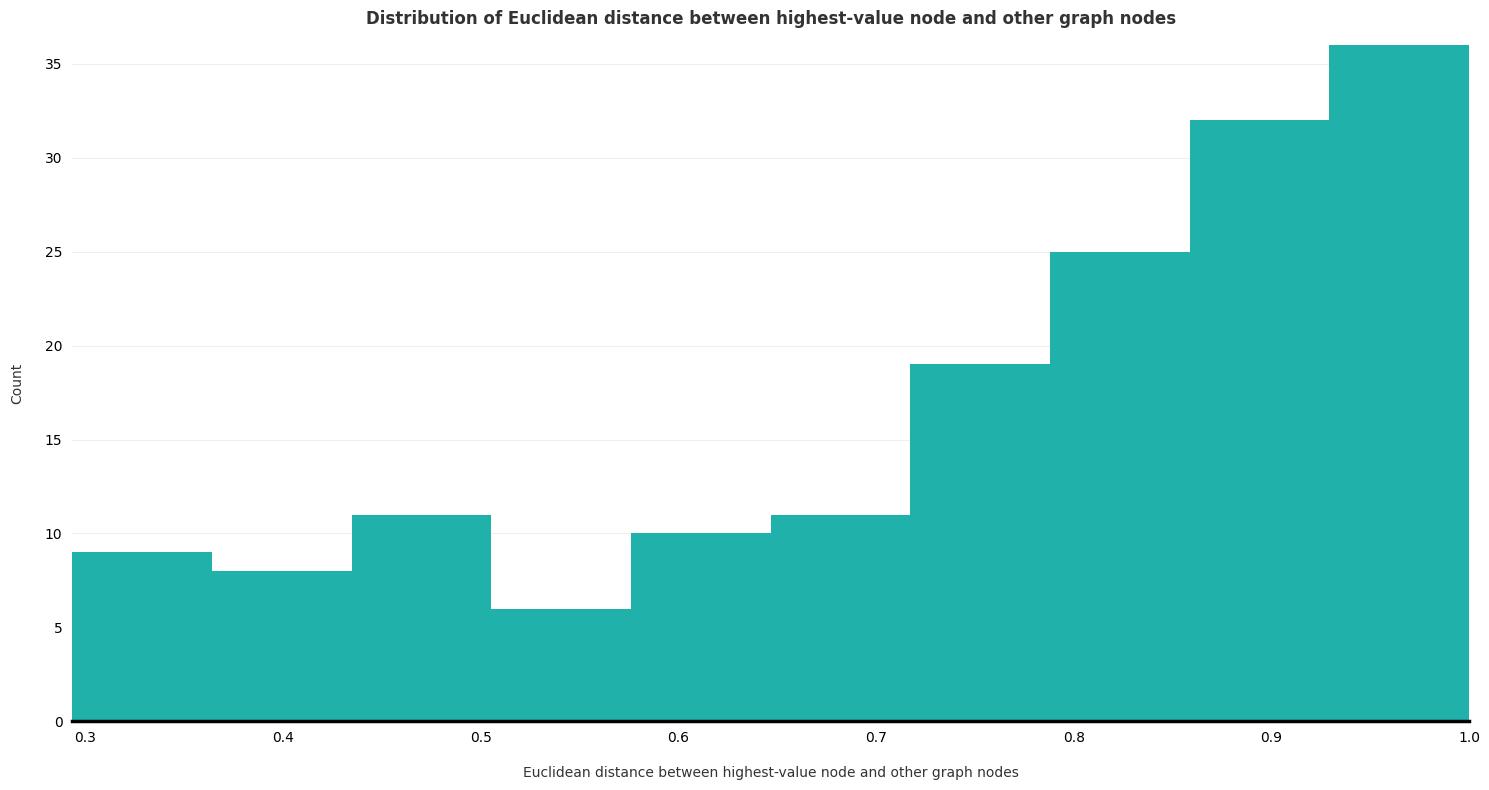

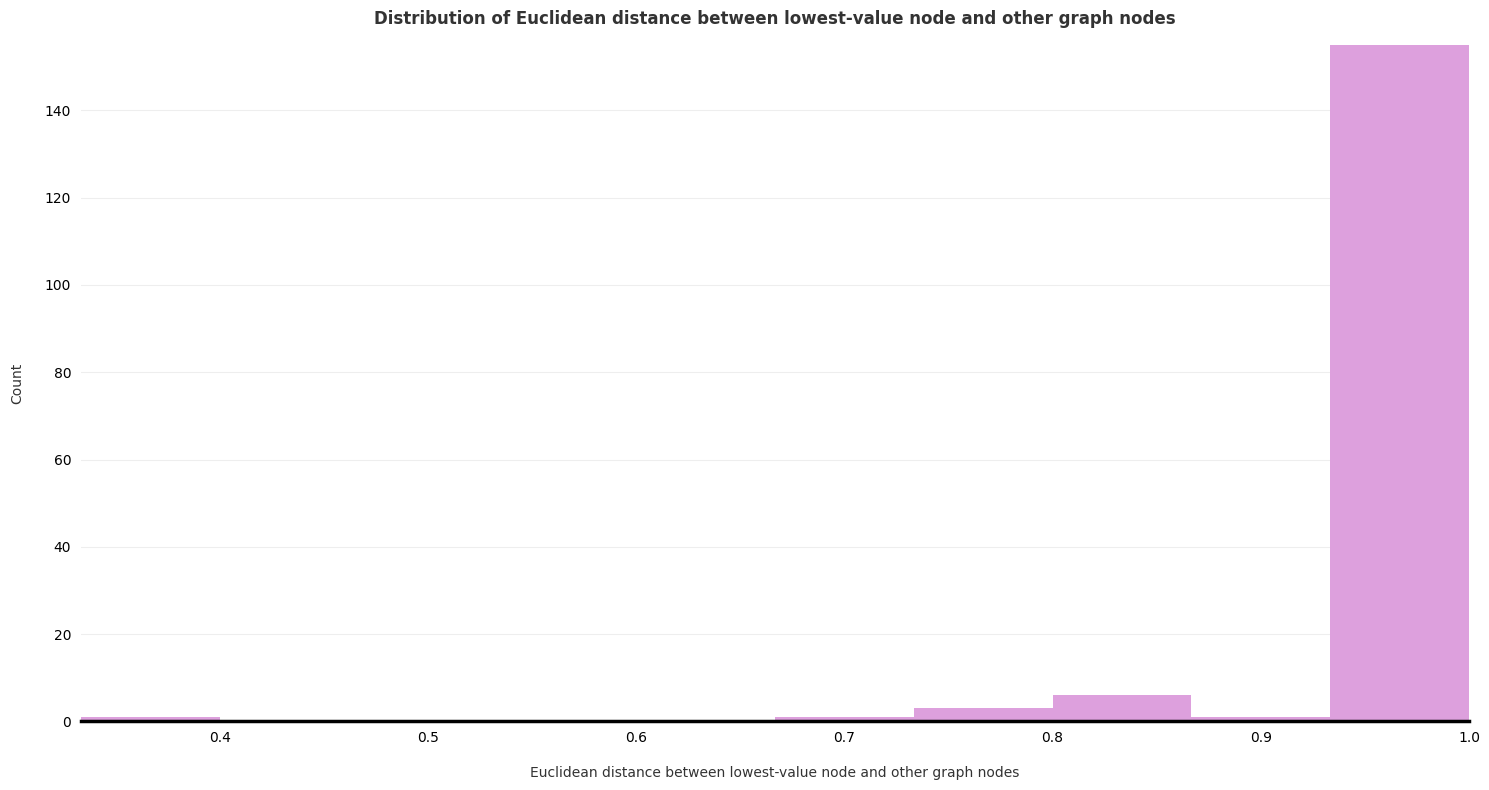

In [18]:
# calculate euclidean distance
eucli_distance_max = euclidean_distance(node_pairs=node_pairs_max)
eucli_distance_min = euclidean_distance(node_pairs=node_pairs_min)

# Plot the distribution
plot_distribution([e for _,_,e in eucli_distance_max]
                  , 'Euclidean distance between highest-value node and other graph nodes'
                  , 'lightseagreen')
plot_distribution([e for _,_,e in eucli_distance_min]
                  , 'Euclidean distance between lowest-value node and other graph nodes'
                  , 'plum')